<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>


# <!-- TITLE --> [BHPD1] - Regression with a Dense Network (DNN)
<!-- DESC --> Simple example of a regression with the dataset Boston Housing Prices Dataset (BHPD)
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Predicts **housing prices** from a set of house features. 
 - Understanding the **principle** and the **architecture** of a regression with a **dense neural network**  


The **[Boston Housing Prices Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)** consists of price of houses in various places in Boston.  
Alongside with price, the dataset also provide theses informations : 

 - CRIM: This is the per capita crime rate by town
 - ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft
 - INDUS: This is the proportion of non-retail business acres per town
 - CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
 - NOX: This is the nitric oxides concentration (parts per 10 million)
 - RM: This is the average number of rooms per dwelling
 - AGE: This is the proportion of owner-occupied units built prior to 1940
 - DIS: This is the weighted distances to five Boston employment centers
 - RAD: This is the index of accessibility to radial highways
 - TAX: This is the full-value property-tax rate per 10,000 dollars
 - PTRATIO: This is the pupil-teacher ratio by town
 - B: This is calculated as 1000(Bk — 0.63)^2, where Bk is the proportion of people of African American descent by town
 - LSTAT: This is the percentage lower status of the population
 - MEDV: This is the median value of owner-occupied homes in 1000 dollars
## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Build a model
 - Train the model
 - Evaluate the result


## Step 1 - Import and init

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os,sys

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('BHPD1')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0
Notebook id          : BHPD1
Run time             : Thursday 14 January 2021, 08:11:19
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /home/pjluc/datasets/fidle
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


## Step 2 - Retrieve data

### 2.1 - Option 1  : From Keras
Boston housing is a famous historic dataset, so we can get it directly from [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)  

In [2]:
# (x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data(test_split=0.2, seed=113)

### 2.2 - Option 2 : From a csv file
More fun !

In [3]:
data = pd.read_csv(f'{datasets_dir}/BHPD/origine/BostonHousing.csv', header=0)

display(data.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))
print('Missing Data : ',data.isna().sum().sum(), '  Shape is : ', data.shape)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


Missing Data :  0   Shape is :  (506, 14)


## Step 3 - Preparing the data
### 3.1 - Split data
We will use 70% of the data for training and 30% for validation.  
The dataset is **shuffled** and shared between **learning** and **testing**.  
x will be input data and y the expected output

In [4]:
# ---- Suffle and Split => train, test
#
data_train = data.sample(frac=0.7, axis=0)
data_test  = data.drop(data_train.index)

# ---- Split => x,y (medv is price)
#
x_train = data_train.drop('medv',  axis=1)
y_train = data_train['medv']
x_test  = data_test.drop('medv',   axis=1)
y_test  = data_test['medv']

print('Original data shape was : ',data.shape)
print('x_train : ',x_train.shape, 'y_train : ',y_train.shape)
print('x_test  : ',x_test.shape,  'y_test  : ',y_test.shape)

Original data shape was :  (506, 14)
x_train :  (354, 13) y_train :  (354,)
x_test  :  (152, 13) y_test  :  (152,)


### 3.2 - Data normalization
**Note :** 
 - All input data must be normalized, train and test.  
 - To do this we will **subtract the mean** and **divide by the standard deviation**.  
 - But test data should not be used in any way, even for normalization.  
 - The mean and the standard deviation will therefore only be calculated with the train data.

In [5]:
display(x_train.describe().style.format("{0:.2f}").set_caption("Before normalization :"))

mean = x_train.mean()
std  = x_train.std()
x_train = (x_train - mean) / std
x_test  = (x_test  - mean) / std

display(x_train.describe().style.format("{0:.2f}").set_caption("After normalization :"))
display(x_train.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))

x_train, y_train = np.array(x_train), np.array(y_train)
x_test,  y_test  = np.array(x_test),  np.array(y_test)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,3.83,11.23,11.09,0.06,0.55,6.26,68.56,3.75,9.52,405.68,18.44,356.78,12.99
std,8.75,22.79,6.89,0.25,0.11,0.73,28.80,2.06,8.70,170.12,2.21,89.35,7.50
min,0.01,0.00,1.21,0.00,0.39,3.56,6.20,1.13,1.00,188.00,12.60,2.60,1.73
25%,0.08,0.00,5.19,0.00,0.45,5.86,43.47,2.07,4.00,277.00,17.10,375.61,7.19
50%,0.27,0.00,8.56,0.00,0.54,6.17,78.20,3.17,5.00,329.00,19.10,391.60,11.43
75%,3.83,20.00,18.10,0.00,0.62,6.61,94.57,5.19,24.00,666.00,20.20,396.32,17.30
max,73.53,100.00,27.74,1.00,0.87,8.72,100.00,10.71,24.00,711.00,21.20,396.90,37.97


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.44,-0.49,-1.43,-0.26,-1.45,-3.69,-2.16,-1.27,-0.98,-1.28,-2.64,-3.96,-1.50
25%,-0.43,-0.49,-0.86,-0.26,-0.92,-0.55,-0.87,-0.82,-0.63,-0.76,-0.61,0.21,-0.77
50%,-0.41,-0.49,-0.37,-0.26,-0.14,-0.13,0.33,-0.28,-0.52,-0.45,0.30,0.39,-0.21
75%,-0.00,0.38,1.02,-0.26,0.61,0.48,0.90,0.70,1.66,1.53,0.80,0.44,0.57
max,7.96,3.90,2.42,3.79,2.78,3.36,1.09,3.39,1.66,1.79,1.25,0.45,3.33


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
503,-0.43,-0.49,0.12,-0.26,0.17,0.97,0.78,-0.77,-0.98,-0.78,1.16,0.45,-0.98
121,-0.43,-0.49,2.11,-0.26,0.24,-0.35,0.54,-0.75,-0.86,-1.28,0.30,0.23,0.17
228,-0.40,-0.49,-0.71,-0.26,-0.44,1.94,-1.79,-0.18,-0.18,-0.58,-0.47,0.23,-1.21
478,0.73,-0.49,1.02,-0.26,0.53,-0.11,0.98,-0.77,1.66,1.53,0.80,0.26,0.67
196,-0.43,3.02,-1.39,-0.26,-1.32,1.40,-1.20,1.73,-0.86,-0.45,-2.64,0.45,-1.19


## Step 4 - Build a model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [6]:
  def get_model_v1(shape):
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape, name="InputLayer"))
    model.add(keras.layers.Dense(64, activation='relu', name='Dense_n1'))
    model.add(keras.layers.Dense(64, activation='relu', name='Dense_n2'))
    model.add(keras.layers.Dense(1, name='Output'))
    
    model.compile(optimizer = 'rmsprop',
                  loss      = 'mse',
                  metrics   = ['mae', 'mse'] )
    return model

## Step 5 - Train the model
### 5.1 - Get it

In [7]:
model=get_model_v1( (13,) )

model.summary()

# img=keras.utils.plot_model( model, to_file='./run/model.png', show_shapes=True, show_layer_names=True, dpi=96)
# display(img)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_n1 (Dense)             (None, 64)                896       
_________________________________________________________________
Dense_n2 (Dense)             (None, 64)                4160      
_________________________________________________________________
Output (Dense)               (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### 5.2 - Train it

In [8]:
history = model.fit(x_train,
                    y_train,
                    epochs          = 100,
                    batch_size      = 10,
                    verbose         = 1,
                    validation_data = (x_test, y_test))

Epoch 1/100


 1/36 [..............................] - ETA: 0s - loss: 407.3206 - mae: 18.8522 - mse: 407.3206

36/36 [==============================] - 0s 5ms/step - loss: 512.6953 - mae: 20.4214 - mse: 512.6953 - val_loss: 371.6987 - val_mae: 17.6408 - val_mse: 371.6987


Epoch 2/100
 1/36 [..............................] - ETA: 0s - loss: 416.8376 - mae: 19.2768 - mse: 416.8376

36/36 [==============================] - 0s 2ms/step - loss: 288.0607 - mae: 14.3196 - mse: 288.0607 - val_loss: 148.8738 - val_mae: 10.0385 - val_mse: 148.8738


Epoch 3/100
 1/36 [..............................] - ETA: 0s - loss: 127.6482 - mae: 9.7656 - mse: 127.6482

36/36 [==============================] - 0s 2ms/step - loss: 113.5676 - mae: 7.8054 - mse: 113.5676 - val_loss: 63.2754 - val_mae: 6.2580 - val_mse: 63.2754


Epoch 4/100
 1/36 [..............................] - ETA: 0s - loss: 45.3920 - mae: 4.4821 - mse: 45.3920

36/36 [==============================] - 0s 2ms/step - loss: 59.1808 - mae: 5.4870 - mse: 59.1808 - val_loss: 33.1852 - val_mae: 4.4691 - val_mse: 33.1852


Epoch 5/100
 1/36 [..............................] - ETA: 0s - loss: 57.9958 - mae: 5.6935 - mse: 57.9958

36/36 [==============================] - 0s 2ms/step - loss: 38.4790 - mae: 4.3153 - mse: 38.4790 - val_loss: 22.4361 - val_mae: 3.5836 - val_mse: 22.4361


Epoch 6/100
 1/36 [..............................] - ETA: 0s - loss: 69.7640 - mae: 5.7963 - mse: 69.7640

36/36 [==============================] - 0s 2ms/step - loss: 28.4822 - mae: 3.8363 - mse: 28.4822 - val_loss: 17.4567 - val_mae: 3.0233 - val_mse: 17.4567


Epoch 7/100
 1/36 [..............................] - ETA: 0s - loss: 11.3394 - mae: 2.6114 - mse: 11.3394

36/36 [==============================] - 0s 2ms/step - loss: 23.7231 - mae: 3.4658 - mse: 23.7231 - val_loss: 16.7736 - val_mae: 2.9227 - val_mse: 16.7736


Epoch 8/100
 1/36 [..............................] - ETA: 0s - loss: 24.4488 - mae: 3.8661 - mse: 24.4488

36/36 [==============================] - 0s 2ms/step - loss: 20.6117 - mae: 3.1927 - mse: 20.6117 - val_loss: 16.6082 - val_mae: 2.7662 - val_mse: 16.6082


Epoch 9/100
 1/36 [..............................] - ETA: 0s - loss: 14.4122 - mae: 3.1264 - mse: 14.4122

36/36 [==============================] - 0s 2ms/step - loss: 18.6191 - mae: 3.0232 - mse: 18.6191 - val_loss: 17.2049 - val_mae: 2.7424 - val_mse: 17.2049


Epoch 10/100
 1/36 [..............................] - ETA: 0s - loss: 5.4165 - mae: 1.9410 - mse: 5.4165

36/36 [==============================] - 0s 2ms/step - loss: 17.0503 - mae: 2.8785 - mse: 17.0503 - val_loss: 16.6766 - val_mae: 2.6310 - val_mse: 16.6766


Epoch 11/100
 1/36 [..............................] - ETA: 0s - loss: 8.4784 - mae: 2.1575 - mse: 8.4784

36/36 [==============================] - 0s 2ms/step - loss: 15.7881 - mae: 2.8371 - mse: 15.7881 - val_loss: 17.9815 - val_mae: 2.7781 - val_mse: 17.9815


Epoch 12/100
 1/36 [..............................] - ETA: 0s - loss: 13.8739 - mae: 2.6540 - mse: 13.8739

36/36 [==============================] - 0s 2ms/step - loss: 14.9784 - mae: 2.6886 - mse: 14.9784 - val_loss: 17.6274 - val_mae: 2.6635 - val_mse: 17.6274


Epoch 13/100
 1/36 [..............................] - ETA: 0s - loss: 9.3338 - mae: 2.6182 - mse: 9.3338

36/36 [==============================] - 0s 2ms/step - loss: 14.2906 - mae: 2.6540 - mse: 14.2906 - val_loss: 16.9495 - val_mae: 2.6102 - val_mse: 16.9495


Epoch 14/100
 1/36 [..............................] - ETA: 0s - loss: 10.4900 - mae: 2.5056 - mse: 10.4900

36/36 [==============================] - 0s 2ms/step - loss: 13.5513 - mae: 2.5605 - mse: 13.5513 - val_loss: 17.6257 - val_mae: 2.6396 - val_mse: 17.6257


Epoch 15/100
 1/36 [..............................] - ETA: 0s - loss: 10.3618 - mae: 2.4442 - mse: 10.3618

36/36 [==============================] - 0s 2ms/step - loss: 12.7591 - mae: 2.5359 - mse: 12.7591 - val_loss: 16.8116 - val_mae: 2.6863 - val_mse: 16.8116


Epoch 16/100
 1/36 [..............................] - ETA: 0s - loss: 12.4388 - mae: 2.4520 - mse: 12.4388

36/36 [==============================] - 0s 2ms/step - loss: 12.4915 - mae: 2.4515 - mse: 12.4915 - val_loss: 16.9179 - val_mae: 2.5154 - val_mse: 16.9179


Epoch 17/100
 1/36 [..............................] - ETA: 0s - loss: 9.0083 - mae: 2.2781 - mse: 9.0083

36/36 [==============================] - 0s 2ms/step - loss: 12.1468 - mae: 2.4788 - mse: 12.1468 - val_loss: 16.8544 - val_mae: 2.5007 - val_mse: 16.8544


Epoch 18/100
 1/36 [..............................] - ETA: 0s - loss: 7.3079 - mae: 2.0934 - mse: 7.3079

36/36 [==============================] - 0s 2ms/step - loss: 11.8557 - mae: 2.3900 - mse: 11.8557 - val_loss: 18.2582 - val_mae: 2.6944 - val_mse: 18.2582


Epoch 19/100
 1/36 [..............................] - ETA: 0s - loss: 7.2752 - mae: 2.0977 - mse: 7.2752

36/36 [==============================] - 0s 2ms/step - loss: 11.5226 - mae: 2.3760 - mse: 11.5226 - val_loss: 17.4870 - val_mae: 2.5315 - val_mse: 17.4870


Epoch 20/100
 1/36 [..............................] - ETA: 0s - loss: 12.8938 - mae: 3.0963 - mse: 12.8938

36/36 [==============================] - 0s 2ms/step - loss: 11.0516 - mae: 2.3540 - mse: 11.0516 - val_loss: 15.7856 - val_mae: 2.4997 - val_mse: 15.7856


Epoch 21/100
 1/36 [..............................] - ETA: 0s - loss: 8.5917 - mae: 1.7147 - mse: 8.5917

36/36 [==============================] - 0s 2ms/step - loss: 11.0540 - mae: 2.3189 - mse: 11.0540 - val_loss: 15.8711 - val_mae: 2.4711 - val_mse: 15.8711


Epoch 22/100
 1/36 [..............................] - ETA: 0s - loss: 5.7946 - mae: 1.9941 - mse: 5.7946

36/36 [==============================] - 0s 2ms/step - loss: 10.9296 - mae: 2.2981 - mse: 10.9296 - val_loss: 15.5044 - val_mae: 2.4868 - val_mse: 15.5044


Epoch 23/100
 1/36 [..............................] - ETA: 0s - loss: 27.7916 - mae: 3.7462 - mse: 27.7916

36/36 [==============================] - 0s 2ms/step - loss: 10.7570 - mae: 2.2583 - mse: 10.7570 - val_loss: 16.8619 - val_mae: 2.4752 - val_mse: 16.8619


Epoch 24/100
 1/36 [..............................] - ETA: 0s - loss: 5.5477 - mae: 1.8999 - mse: 5.5477

36/36 [==============================] - 0s 2ms/step - loss: 10.5309 - mae: 2.1914 - mse: 10.5309 - val_loss: 18.0421 - val_mae: 2.5139 - val_mse: 18.0421


Epoch 25/100
 1/36 [..............................] - ETA: 0s - loss: 3.8592 - mae: 1.6594 - mse: 3.8592

36/36 [==============================] - 0s 2ms/step - loss: 10.2207 - mae: 2.2299 - mse: 10.2207 - val_loss: 15.7059 - val_mae: 2.4589 - val_mse: 15.7059


Epoch 26/100
 1/36 [..............................] - ETA: 0s - loss: 24.1743 - mae: 3.4121 - mse: 24.1743

36/36 [==============================] - 0s 2ms/step - loss: 10.2164 - mae: 2.2412 - mse: 10.2164 - val_loss: 17.6199 - val_mae: 2.5253 - val_mse: 17.6199


Epoch 27/100
 1/36 [..............................] - ETA: 0s - loss: 7.3696 - mae: 2.0420 - mse: 7.3696

36/36 [==============================] - 0s 2ms/step - loss: 9.7297 - mae: 2.1741 - mse: 9.7297 - val_loss: 16.4737 - val_mae: 2.4798 - val_mse: 16.4737


Epoch 28/100
 1/36 [..............................] - ETA: 0s - loss: 2.2318 - mae: 1.1947 - mse: 2.2318

36/36 [==============================] - 0s 2ms/step - loss: 9.8063 - mae: 2.1716 - mse: 9.8063 - val_loss: 15.2677 - val_mae: 2.4739 - val_mse: 15.2677


Epoch 29/100
 1/36 [..............................] - ETA: 0s - loss: 22.2630 - mae: 3.0200 - mse: 22.2630

36/36 [==============================] - 0s 2ms/step - loss: 9.6612 - mae: 2.1797 - mse: 9.6612 - val_loss: 14.1823 - val_mae: 2.4188 - val_mse: 14.1823


Epoch 30/100
 1/36 [..............................] - ETA: 0s - loss: 22.5960 - mae: 3.0913 - mse: 22.5960

36/36 [==============================] - 0s 2ms/step - loss: 9.6477 - mae: 2.1720 - mse: 9.6477 - val_loss: 15.4119 - val_mae: 2.4218 - val_mse: 15.4119


Epoch 31/100
 1/36 [..............................] - ETA: 0s - loss: 4.5775 - mae: 1.8271 - mse: 4.5775

36/36 [==============================] - 0s 2ms/step - loss: 9.3244 - mae: 2.1315 - mse: 9.3244 - val_loss: 15.6595 - val_mae: 2.4155 - val_mse: 15.6595


Epoch 32/100
 1/36 [..............................] - ETA: 0s - loss: 5.1524 - mae: 1.8350 - mse: 5.1524

36/36 [==============================] - 0s 2ms/step - loss: 9.2568 - mae: 2.1106 - mse: 9.2568 - val_loss: 14.5170 - val_mae: 2.5860 - val_mse: 14.5170


Epoch 33/100
 1/36 [..............................] - ETA: 0s - loss: 15.8990 - mae: 2.7259 - mse: 15.8990

36/36 [==============================] - 0s 2ms/step - loss: 9.3815 - mae: 2.1274 - mse: 9.3815 - val_loss: 15.3208 - val_mae: 2.4046 - val_mse: 15.3208


Epoch 34/100
 1/36 [..............................] - ETA: 0s - loss: 25.0873 - mae: 3.0151 - mse: 25.0873

36/36 [==============================] - 0s 2ms/step - loss: 8.8580 - mae: 2.1207 - mse: 8.8580 - val_loss: 14.9003 - val_mae: 2.4407 - val_mse: 14.9003


Epoch 35/100
 1/36 [..............................] - ETA: 0s - loss: 47.2871 - mae: 3.2998 - mse: 47.2871

36/36 [==============================] - 0s 2ms/step - loss: 8.9432 - mae: 2.0632 - mse: 8.9432 - val_loss: 16.1420 - val_mae: 2.4350 - val_mse: 16.1420


Epoch 36/100
 1/36 [..............................] - ETA: 0s - loss: 7.4445 - mae: 2.1548 - mse: 7.4445

36/36 [==============================] - 0s 2ms/step - loss: 8.6326 - mae: 2.0683 - mse: 8.6326 - val_loss: 14.2267 - val_mae: 2.4698 - val_mse: 14.2267


Epoch 37/100
 1/36 [..............................] - ETA: 0s - loss: 7.3137 - mae: 2.2289 - mse: 7.3137

36/36 [==============================] - 0s 2ms/step - loss: 8.7341 - mae: 2.0698 - mse: 8.7341 - val_loss: 14.6117 - val_mae: 2.4487 - val_mse: 14.6117


Epoch 38/100
 1/36 [..............................] - ETA: 0s - loss: 7.0914 - mae: 2.0325 - mse: 7.0914

36/36 [==============================] - 0s 2ms/step - loss: 8.6943 - mae: 2.0261 - mse: 8.6943 - val_loss: 15.2316 - val_mae: 2.5800 - val_mse: 15.2316


Epoch 39/100
 1/36 [..............................] - ETA: 0s - loss: 3.2764 - mae: 1.5102 - mse: 3.2764

36/36 [==============================] - 0s 2ms/step - loss: 8.5876 - mae: 2.0295 - mse: 8.5876 - val_loss: 18.0986 - val_mae: 2.6038 - val_mse: 18.0986


Epoch 40/100
 1/36 [..............................] - ETA: 0s - loss: 5.7968 - mae: 2.1062 - mse: 5.7968

36/36 [==============================] - 0s 3ms/step - loss: 8.5341 - mae: 2.0621 - mse: 8.5341 - val_loss: 13.5799 - val_mae: 2.4364 - val_mse: 13.5799


Epoch 41/100
 1/36 [..............................] - ETA: 0s - loss: 20.1664 - mae: 3.0291 - mse: 20.1664

36/36 [==============================] - 0s 2ms/step - loss: 8.3663 - mae: 1.9890 - mse: 8.3663 - val_loss: 16.7243 - val_mae: 2.6952 - val_mse: 16.7243


Epoch 42/100
 1/36 [..............................] - ETA: 0s - loss: 7.1991 - mae: 2.2748 - mse: 7.1991

36/36 [==============================] - 0s 2ms/step - loss: 8.2688 - mae: 2.0357 - mse: 8.2688 - val_loss: 14.7858 - val_mae: 2.3847 - val_mse: 14.7858


Epoch 43/100
 1/36 [..............................] - ETA: 0s - loss: 1.8338 - mae: 1.0660 - mse: 1.8338

36/36 [==============================] - 0s 2ms/step - loss: 8.1713 - mae: 1.9501 - mse: 8.1713 - val_loss: 13.9294 - val_mae: 2.3886 - val_mse: 13.9294


Epoch 44/100
 1/36 [..............................] - ETA: 0s - loss: 3.2799 - mae: 1.3167 - mse: 3.2799

36/36 [==============================] - 0s 2ms/step - loss: 8.0837 - mae: 1.9946 - mse: 8.0837 - val_loss: 15.0571 - val_mae: 2.3772 - val_mse: 15.0571


Epoch 45/100
 1/36 [..............................] - ETA: 0s - loss: 12.0710 - mae: 2.5895 - mse: 12.0710

36/36 [==============================] - 0s 2ms/step - loss: 7.8297 - mae: 1.9675 - mse: 7.8297 - val_loss: 14.4700 - val_mae: 2.4497 - val_mse: 14.4700


Epoch 46/100
 1/36 [..............................] - ETA: 0s - loss: 8.6554 - mae: 1.7192 - mse: 8.6554

36/36 [==============================] - 0s 2ms/step - loss: 7.8721 - mae: 1.9562 - mse: 7.8721 - val_loss: 15.6275 - val_mae: 2.5021 - val_mse: 15.6275


Epoch 47/100
 1/36 [..............................] - ETA: 0s - loss: 6.6549 - mae: 1.7788 - mse: 6.6549

36/36 [==============================] - 0s 2ms/step - loss: 7.8012 - mae: 1.9234 - mse: 7.8012 - val_loss: 15.4175 - val_mae: 2.4128 - val_mse: 15.4175


Epoch 48/100
 1/36 [..............................] - ETA: 0s - loss: 4.4386 - mae: 1.6254 - mse: 4.4386

36/36 [==============================] - 0s 2ms/step - loss: 7.6501 - mae: 1.9264 - mse: 7.6501 - val_loss: 13.8509 - val_mae: 2.4258 - val_mse: 13.8509


Epoch 49/100
 1/36 [..............................] - ETA: 0s - loss: 3.6743 - mae: 1.6323 - mse: 3.6743

36/36 [==============================] - 0s 2ms/step - loss: 7.6558 - mae: 1.9328 - mse: 7.6558 - val_loss: 14.5430 - val_mae: 2.4151 - val_mse: 14.5430


Epoch 50/100
 1/36 [..............................] - ETA: 0s - loss: 3.6029 - mae: 1.5487 - mse: 3.6029

36/36 [==============================] - 0s 2ms/step - loss: 7.6111 - mae: 1.9027 - mse: 7.6111 - val_loss: 14.9128 - val_mae: 2.3905 - val_mse: 14.9128


Epoch 51/100
 1/36 [..............................] - ETA: 0s - loss: 3.6815 - mae: 1.6452 - mse: 3.6815

36/36 [==============================] - 0s 2ms/step - loss: 7.5492 - mae: 1.9115 - mse: 7.5492 - val_loss: 13.8725 - val_mae: 2.3764 - val_mse: 13.8725


Epoch 52/100
 1/36 [..............................] - ETA: 0s - loss: 9.0226 - mae: 2.2680 - mse: 9.0226

36/36 [==============================] - 0s 2ms/step - loss: 7.3721 - mae: 1.9034 - mse: 7.3721 - val_loss: 14.9186 - val_mae: 2.4914 - val_mse: 14.9186


Epoch 53/100
 1/36 [..............................] - ETA: 0s - loss: 7.9170 - mae: 2.0245 - mse: 7.9170

36/36 [==============================] - 0s 2ms/step - loss: 7.2422 - mae: 1.8615 - mse: 7.2422 - val_loss: 15.5612 - val_mae: 2.4342 - val_mse: 15.5612


Epoch 54/100
 1/36 [..............................] - ETA: 0s - loss: 12.3707 - mae: 2.1982 - mse: 12.3707

36/36 [==============================] - 0s 2ms/step - loss: 7.3332 - mae: 1.9150 - mse: 7.3332 - val_loss: 15.2095 - val_mae: 2.4613 - val_mse: 15.2095


Epoch 55/100
 1/36 [..............................] - ETA: 0s - loss: 7.1180 - mae: 2.1155 - mse: 7.1180

36/36 [==============================] - 0s 2ms/step - loss: 7.2277 - mae: 1.8782 - mse: 7.2277 - val_loss: 15.1990 - val_mae: 2.5274 - val_mse: 15.1990


Epoch 56/100
 1/36 [..............................] - ETA: 0s - loss: 7.8213 - mae: 2.1155 - mse: 7.8213

36/36 [==============================] - 0s 2ms/step - loss: 7.0867 - mae: 1.8471 - mse: 7.0867 - val_loss: 15.9479 - val_mae: 2.5210 - val_mse: 15.9479


Epoch 57/100
 1/36 [..............................] - ETA: 0s - loss: 7.0981 - mae: 2.2654 - mse: 7.0981

36/36 [==============================] - 0s 2ms/step - loss: 7.0518 - mae: 1.8468 - mse: 7.0518 - val_loss: 13.9539 - val_mae: 2.4011 - val_mse: 13.9539


Epoch 58/100
 1/36 [..............................] - ETA: 0s - loss: 3.4035 - mae: 1.4639 - mse: 3.4035

36/36 [==============================] - 0s 2ms/step - loss: 7.0687 - mae: 1.8449 - mse: 7.0687 - val_loss: 13.0074 - val_mae: 2.4371 - val_mse: 13.0074


Epoch 59/100
 1/36 [..............................] - ETA: 0s - loss: 4.0958 - mae: 1.5204 - mse: 4.0958

36/36 [==============================] - 0s 2ms/step - loss: 6.8857 - mae: 1.8453 - mse: 6.8857 - val_loss: 13.9144 - val_mae: 2.4056 - val_mse: 13.9144


Epoch 60/100
 1/36 [..............................] - ETA: 0s - loss: 5.9802 - mae: 1.8256 - mse: 5.9802

36/36 [==============================] - 0s 2ms/step - loss: 6.9196 - mae: 1.8199 - mse: 6.9196 - val_loss: 14.6482 - val_mae: 2.4412 - val_mse: 14.6482


Epoch 61/100
 1/36 [..............................] - ETA: 0s - loss: 4.4707 - mae: 1.7703 - mse: 4.4707

36/36 [==============================] - 0s 2ms/step - loss: 6.7712 - mae: 1.8107 - mse: 6.7712 - val_loss: 13.8300 - val_mae: 2.4093 - val_mse: 13.8300


Epoch 62/100
 1/36 [..............................] - ETA: 0s - loss: 7.0282 - mae: 2.2276 - mse: 7.0282

36/36 [==============================] - 0s 2ms/step - loss: 6.6533 - mae: 1.8254 - mse: 6.6533 - val_loss: 13.9860 - val_mae: 2.4244 - val_mse: 13.9860


Epoch 63/100
 1/36 [..............................] - ETA: 0s - loss: 3.3382 - mae: 1.0856 - mse: 3.3382

36/36 [==============================] - 0s 2ms/step - loss: 6.6135 - mae: 1.8061 - mse: 6.6135 - val_loss: 13.0682 - val_mae: 2.5226 - val_mse: 13.0682


Epoch 64/100
 1/36 [..............................] - ETA: 0s - loss: 2.2947 - mae: 1.1612 - mse: 2.2947

36/36 [==============================] - 0s 2ms/step - loss: 6.6893 - mae: 1.7760 - mse: 6.6893 - val_loss: 13.0032 - val_mae: 2.4997 - val_mse: 13.0032


Epoch 65/100
 1/36 [..............................] - ETA: 0s - loss: 9.3190 - mae: 2.0487 - mse: 9.3190

36/36 [==============================] - 0s 2ms/step - loss: 6.5807 - mae: 1.7694 - mse: 6.5807 - val_loss: 12.8187 - val_mae: 2.4031 - val_mse: 12.8187


Epoch 66/100
 1/36 [..............................] - ETA: 0s - loss: 7.7041 - mae: 2.1078 - mse: 7.7041

36/36 [==============================] - 0s 2ms/step - loss: 6.6294 - mae: 1.7897 - mse: 6.6294 - val_loss: 13.4268 - val_mae: 2.3852 - val_mse: 13.4268


Epoch 67/100
 1/36 [..............................] - ETA: 0s - loss: 7.1215 - mae: 2.1463 - mse: 7.1215

36/36 [==============================] - 0s 2ms/step - loss: 6.4963 - mae: 1.7647 - mse: 6.4963 - val_loss: 14.4899 - val_mae: 2.4291 - val_mse: 14.4899


Epoch 68/100
 1/36 [..............................] - ETA: 0s - loss: 6.8348 - mae: 2.0396 - mse: 6.8348

36/36 [==============================] - 0s 2ms/step - loss: 6.4055 - mae: 1.7644 - mse: 6.4055 - val_loss: 13.8988 - val_mae: 2.4481 - val_mse: 13.8988


Epoch 69/100
 1/36 [..............................] - ETA: 0s - loss: 4.1401 - mae: 1.6643 - mse: 4.1401

36/36 [==============================] - 0s 2ms/step - loss: 6.3309 - mae: 1.7587 - mse: 6.3309 - val_loss: 12.7296 - val_mae: 2.4945 - val_mse: 12.7296


Epoch 70/100
 1/36 [..............................] - ETA: 0s - loss: 4.3014 - mae: 1.5148 - mse: 4.3014

36/36 [==============================] - 0s 2ms/step - loss: 6.3321 - mae: 1.7287 - mse: 6.3321 - val_loss: 12.9661 - val_mae: 2.4811 - val_mse: 12.9661


Epoch 71/100
 1/36 [..............................] - ETA: 0s - loss: 2.4335 - mae: 1.0470 - mse: 2.4335

36/36 [==============================] - 0s 2ms/step - loss: 6.3025 - mae: 1.7535 - mse: 6.3025 - val_loss: 12.6502 - val_mae: 2.4611 - val_mse: 12.6502


Epoch 72/100
 1/36 [..............................] - ETA: 0s - loss: 4.0539 - mae: 1.4353 - mse: 4.0539

36/36 [==============================] - 0s 2ms/step - loss: 6.2513 - mae: 1.7225 - mse: 6.2513 - val_loss: 12.7984 - val_mae: 2.4493 - val_mse: 12.7984


Epoch 73/100
 1/36 [..............................] - ETA: 0s - loss: 3.2204 - mae: 1.3434 - mse: 3.2204

36/36 [==============================] - 0s 2ms/step - loss: 6.0639 - mae: 1.7208 - mse: 6.0639 - val_loss: 13.8270 - val_mae: 2.4772 - val_mse: 13.8270


Epoch 74/100
 1/36 [..............................] - ETA: 0s - loss: 10.4668 - mae: 2.1620 - mse: 10.4668

36/36 [==============================] - 0s 2ms/step - loss: 6.1868 - mae: 1.7145 - mse: 6.1868 - val_loss: 14.1506 - val_mae: 2.5845 - val_mse: 14.1506


Epoch 75/100
 1/36 [..............................] - ETA: 0s - loss: 3.4450 - mae: 1.7198 - mse: 3.4450

36/36 [==============================] - 0s 2ms/step - loss: 6.0078 - mae: 1.7327 - mse: 6.0078 - val_loss: 12.5845 - val_mae: 2.4593 - val_mse: 12.5845


Epoch 76/100
 1/36 [..............................] - ETA: 0s - loss: 8.9283 - mae: 1.8763 - mse: 8.9283

36/36 [==============================] - 0s 2ms/step - loss: 5.9769 - mae: 1.6597 - mse: 5.9769 - val_loss: 13.7416 - val_mae: 2.4264 - val_mse: 13.7416


Epoch 77/100
 1/36 [..............................] - ETA: 0s - loss: 1.7732 - mae: 1.1096 - mse: 1.7732

36/36 [==============================] - 0s 2ms/step - loss: 5.7378 - mae: 1.6430 - mse: 5.7378 - val_loss: 14.9285 - val_mae: 2.4672 - val_mse: 14.9285


Epoch 78/100
 1/36 [..............................] - ETA: 0s - loss: 4.6906 - mae: 1.5438 - mse: 4.6906

36/36 [==============================] - 0s 2ms/step - loss: 6.0702 - mae: 1.7073 - mse: 6.0702 - val_loss: 13.5002 - val_mae: 2.4574 - val_mse: 13.5002


Epoch 79/100
 1/36 [..............................] - ETA: 0s - loss: 9.5350 - mae: 2.0934 - mse: 9.5350

36/36 [==============================] - 0s 2ms/step - loss: 5.6094 - mae: 1.6573 - mse: 5.6094 - val_loss: 14.1111 - val_mae: 2.5431 - val_mse: 14.1111


Epoch 80/100
 1/36 [..............................] - ETA: 0s - loss: 9.2028 - mae: 2.3519 - mse: 9.2028

36/36 [==============================] - 0s 2ms/step - loss: 5.6957 - mae: 1.6749 - mse: 5.6957 - val_loss: 13.2552 - val_mae: 2.5393 - val_mse: 13.2552


Epoch 81/100
 1/36 [..............................] - ETA: 0s - loss: 2.7361 - mae: 1.4276 - mse: 2.7361

36/36 [==============================] - 0s 2ms/step - loss: 5.7200 - mae: 1.6645 - mse: 5.7200 - val_loss: 13.0018 - val_mae: 2.4606 - val_mse: 13.0018


Epoch 82/100
 1/36 [..............................] - ETA: 0s - loss: 7.6291 - mae: 2.1848 - mse: 7.6291

36/36 [==============================] - 0s 2ms/step - loss: 5.6837 - mae: 1.6614 - mse: 5.6837 - val_loss: 12.9487 - val_mae: 2.4460 - val_mse: 12.9487


Epoch 83/100
 1/36 [..............................] - ETA: 0s - loss: 11.1980 - mae: 2.2394 - mse: 11.1980

36/36 [==============================] - 0s 2ms/step - loss: 5.6187 - mae: 1.6395 - mse: 5.6187 - val_loss: 13.6152 - val_mae: 2.4410 - val_mse: 13.6152


Epoch 84/100
 1/36 [..............................] - ETA: 0s - loss: 1.2645 - mae: 1.0280 - mse: 1.2645

36/36 [==============================] - 0s 2ms/step - loss: 5.5375 - mae: 1.6625 - mse: 5.5375 - val_loss: 13.7843 - val_mae: 2.4875 - val_mse: 13.7843


Epoch 85/100
 1/36 [..............................] - ETA: 0s - loss: 6.9352 - mae: 1.8240 - mse: 6.9352

36/36 [==============================] - 0s 2ms/step - loss: 5.5747 - mae: 1.6138 - mse: 5.5747 - val_loss: 12.9473 - val_mae: 2.4488 - val_mse: 12.9473


Epoch 86/100
 1/36 [..............................] - ETA: 0s - loss: 1.5318 - mae: 1.0513 - mse: 1.5318

36/36 [==============================] - 0s 2ms/step - loss: 5.4318 - mae: 1.5857 - mse: 5.4318 - val_loss: 13.7020 - val_mae: 2.5508 - val_mse: 13.7020


Epoch 87/100
 1/36 [..............................] - ETA: 0s - loss: 1.8362 - mae: 0.9933 - mse: 1.8362

36/36 [==============================] - 0s 2ms/step - loss: 5.4703 - mae: 1.6559 - mse: 5.4703 - val_loss: 13.3855 - val_mae: 2.4788 - val_mse: 13.3855


Epoch 88/100
 1/36 [..............................] - ETA: 0s - loss: 8.7715 - mae: 1.9173 - mse: 8.7715

36/36 [==============================] - 0s 2ms/step - loss: 5.3036 - mae: 1.6029 - mse: 5.3036 - val_loss: 14.0921 - val_mae: 2.4609 - val_mse: 14.0921


Epoch 89/100
 1/36 [..............................] - ETA: 0s - loss: 3.0246 - mae: 1.4390 - mse: 3.0246

36/36 [==============================] - 0s 2ms/step - loss: 5.3773 - mae: 1.5968 - mse: 5.3773 - val_loss: 13.9248 - val_mae: 2.4907 - val_mse: 13.9248


Epoch 90/100
 1/36 [..............................] - ETA: 0s - loss: 2.4601 - mae: 1.3539 - mse: 2.4601

36/36 [==============================] - 0s 2ms/step - loss: 5.2268 - mae: 1.5829 - mse: 5.2268 - val_loss: 14.6749 - val_mae: 2.5361 - val_mse: 14.6749


Epoch 91/100
 1/36 [..............................] - ETA: 0s - loss: 3.8107 - mae: 1.6357 - mse: 3.8107

36/36 [==============================] - 0s 2ms/step - loss: 5.1736 - mae: 1.5926 - mse: 5.1736 - val_loss: 13.4514 - val_mae: 2.5856 - val_mse: 13.4514


Epoch 92/100
 1/36 [..............................] - ETA: 0s - loss: 19.5630 - mae: 3.1410 - mse: 19.5630

36/36 [==============================] - 0s 2ms/step - loss: 5.2418 - mae: 1.5954 - mse: 5.2418 - val_loss: 12.6804 - val_mae: 2.4248 - val_mse: 12.6804


Epoch 93/100
 1/36 [..............................] - ETA: 0s - loss: 3.0834 - mae: 1.4256 - mse: 3.0834

36/36 [==============================] - 0s 2ms/step - loss: 5.2488 - mae: 1.5989 - mse: 5.2488 - val_loss: 12.4736 - val_mae: 2.4226 - val_mse: 12.4736


Epoch 94/100
 1/36 [..............................] - ETA: 0s - loss: 5.8809 - mae: 2.1107 - mse: 5.8809

36/36 [==============================] - 0s 2ms/step - loss: 5.0619 - mae: 1.5615 - mse: 5.0619 - val_loss: 13.4973 - val_mae: 2.4437 - val_mse: 13.4973


Epoch 95/100
 1/36 [..............................] - ETA: 0s - loss: 2.7440 - mae: 1.3863 - mse: 2.7440

36/36 [==============================] - 0s 2ms/step - loss: 4.9695 - mae: 1.5607 - mse: 4.9695 - val_loss: 12.2446 - val_mae: 2.3704 - val_mse: 12.2446


Epoch 96/100
 1/36 [..............................] - ETA: 0s - loss: 2.5596 - mae: 1.2999 - mse: 2.5596

36/36 [==============================] - 0s 2ms/step - loss: 5.0109 - mae: 1.5504 - mse: 5.0109 - val_loss: 12.8840 - val_mae: 2.5403 - val_mse: 12.8840


Epoch 97/100
 1/36 [..............................] - ETA: 0s - loss: 3.7687 - mae: 1.5506 - mse: 3.7687

36/36 [==============================] - 0s 2ms/step - loss: 4.8156 - mae: 1.5307 - mse: 4.8156 - val_loss: 13.2364 - val_mae: 2.5249 - val_mse: 13.2364


Epoch 98/100
 1/36 [..............................] - ETA: 0s - loss: 7.0708 - mae: 1.5772 - mse: 7.0708

36/36 [==============================] - 0s 2ms/step - loss: 4.9354 - mae: 1.5551 - mse: 4.9354 - val_loss: 12.9653 - val_mae: 2.3904 - val_mse: 12.9653


Epoch 99/100
 1/36 [..............................] - ETA: 0s - loss: 2.7436 - mae: 1.3471 - mse: 2.7436

36/36 [==============================] - 0s 2ms/step - loss: 5.0056 - mae: 1.5565 - mse: 5.0056 - val_loss: 12.4294 - val_mae: 2.4691 - val_mse: 12.4294


Epoch 100/100
 1/36 [..............................] - ETA: 0s - loss: 5.6867 - mae: 1.9347 - mse: 5.6867

36/36 [==============================] - 0s 2ms/step - loss: 4.7599 - mae: 1.5225 - mse: 4.7599 - val_loss: 14.2900 - val_mae: 2.5245 - val_mse: 14.2900


## Step 6 - Evaluate
### 6.1 - Model evaluation
MAE =  Mean Absolute Error (between the labels and predictions)  
A mae equal to 3 represents an average error in prediction of $3k.

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)

print('x_test / loss      : {:5.4f}'.format(score[0]))
print('x_test / mae       : {:5.4f}'.format(score[1]))
print('x_test / mse       : {:5.4f}'.format(score[2]))

x_test / loss      : 14.2900
x_test / mae       : 2.5245
x_test / mse       : 14.2900


### 6.2 - Training history
What was the best result during our training ?

In [10]:
df=pd.DataFrame(data=history.history)
display(df)

,loss,mae,mse,val_loss,val_mae,val_mse
0,512.695251,20.421410,512.695251,371.698700,17.640818,371.698700
1,288.060730,14.319571,288.060730,148.873795,10.038457,148.873795
2,113.567566,7.805418,113.567551,63.275372,6.258007,63.275372
3,59.180847,5.487036,59.180840,33.185242,4.469059,33.185242
4,38.479008,4.315325,38.479008,22.436140,3.583613,22.436140
...,...,...,...,...,...,...
95,5.010880,1.550388,5.010880,12.883963,2.540313,12.883963
96,4.815630,1.530723,4.815630,13.236412,2.524947,13.236412
97,4.935360,1.555126,4.935360,12.965294,2.390428,12.965294
98,5.005613,1.556515,5.005613,12.429406,2.469126,12.429406


In [11]:
print("min( val_mae ) : {:.4f}".format( min(history.history["val_mae"]) ) )

min( val_mae ) : 2.3704


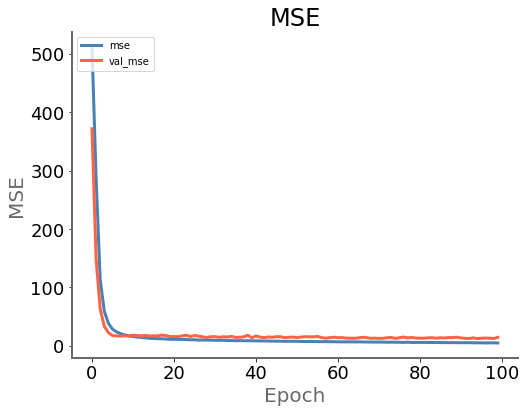

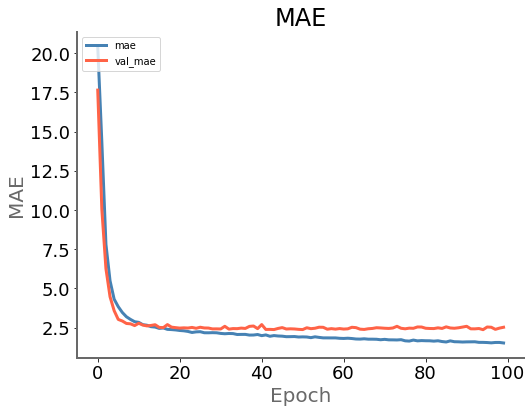

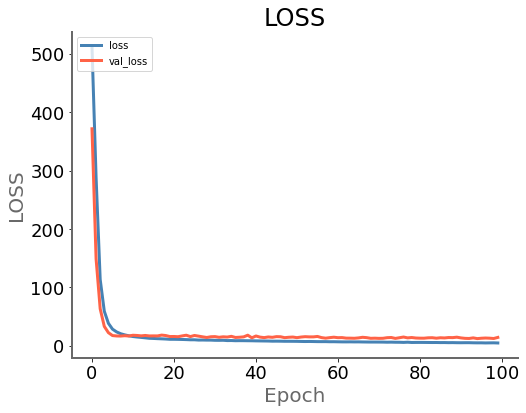

In [12]:
pwk.plot_history(history, plot={'MSE' :['mse', 'val_mse'],
                                'MAE' :['mae', 'val_mae'],
                                'LOSS':['loss','val_loss']}, save_as='01-history')

## Step 7 - Make a prediction
The data must be normalized with the parameters (mean, std) previously used.

In [13]:
my_data = [ 1.26425925, -0.48522739,  1.0436489 , -0.23112788,  1.37120745,
       -2.14308942,  1.13489104, -1.06802005,  1.71189006,  1.57042287,
        0.77859951,  0.14769795,  2.7585581 ]
real_price = 10.4

my_data=np.array(my_data).reshape(1,13)

In [14]:

predictions = model.predict( my_data )
print("Prediction : {:.2f} K$".format(predictions[0][0]))
print("Reality    : {:.2f} K$".format(real_price))

Prediction : 10.24 K$
Reality    : 10.40 K$


In [15]:
pwk.end()

End time is : Thursday 14 January 2021, 08:11:28
Duration is : 00:00:09 085ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>